In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.linear_model import LinearRegression

In [27]:
boston = datasets.load_boston()

In [28]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [29]:
boston

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [30]:
# Needs better way to be read

In [31]:
df = pd.DataFrame(data=boston['data'], 
                  columns=boston['feature_names'])
df['PRICE'] = pd.Series(boston.target)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [32]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64

In [33]:
# There are no NaN's values per column, no need to clean the data

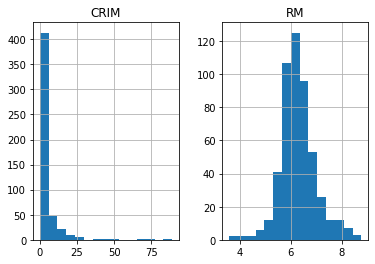

In [34]:
hist = df.hist(column = ['CRIM', 'RM'], bins = 15)

In [35]:
df.shape  # Boston dataset size (rows, columns)

(506, 14)

In [36]:
# Linear regression graphs for each column 

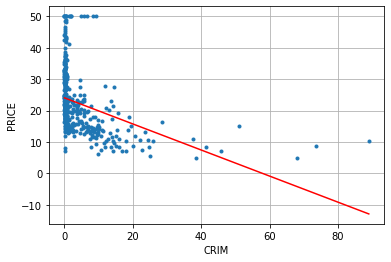

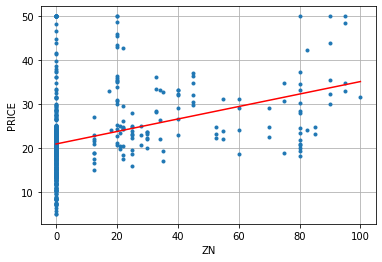

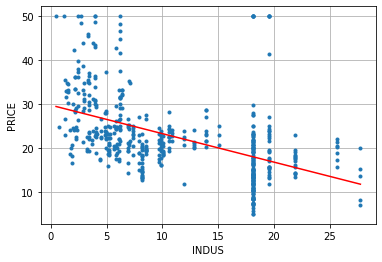

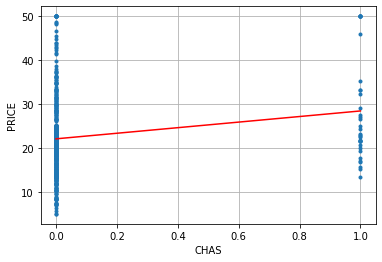

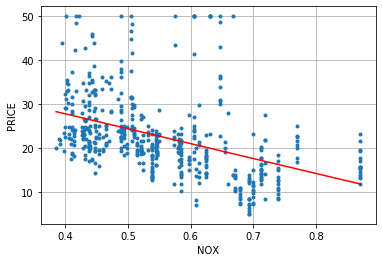

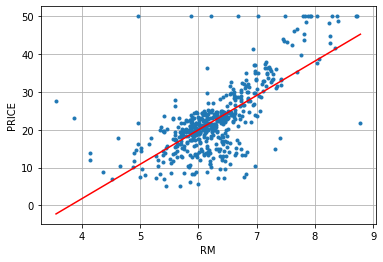

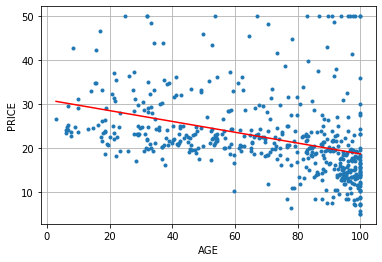

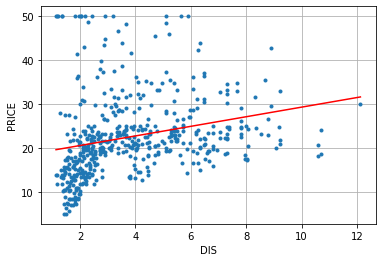

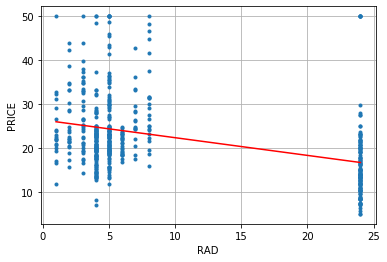

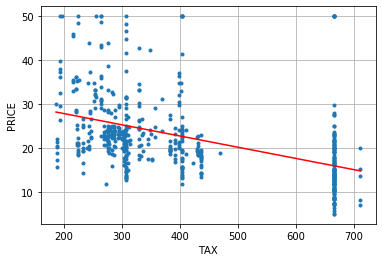

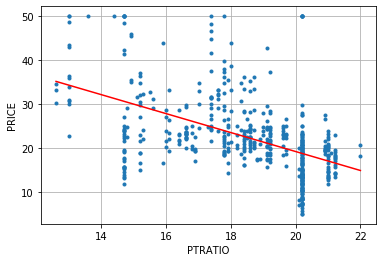

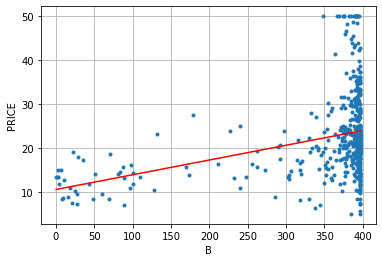

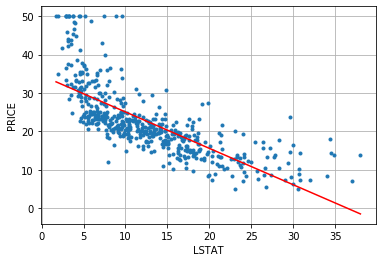

In [37]:
Y = boston.target
reg = LinearRegression()
for index, feature_name in enumerate(boston.feature_names):
    X = boston.data[:, index]
    X = X.reshape((-1, 1))
    reg.fit(X, Y)
    lin_reg = reg.score(X, Y)
    intercept = reg.intercept_
    coef = reg.coef_
    x = np.linspace(X.min(), X.max(), 506)
    y = intercept + coef*x
    plt.figure("Plot")
    plt.plot(X, Y, '.', x, y, 'r-')
    plt.xlabel('{}'.format(df.columns[index]))
    plt.ylabel('PRICE')
    plt.grid()
    plt.show()

In [38]:
# Linear regression graphs for these two columns picked for histograms as well

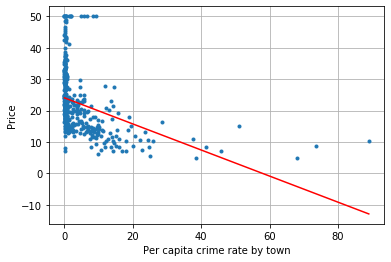

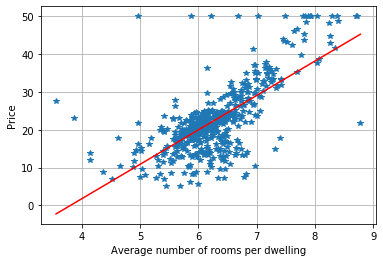

In [39]:
crim = df[['CRIM']]
rm = df[['RM']]

reg_1 = LinearRegression()
reg_1.fit(crim, boston.target)
pred_1 = reg_1.score(crim, boston.target)
intercept = reg_1.intercept_
coef = reg_1.coef_
x = np.linspace(crim.min(), crim.max(), 506)
y = intercept + coef*x
plt.figure("Plot")
plt.plot(crim, Y, '.', x, y, 'r-')
plt.xlabel('Per capita crime rate by town')
plt.ylabel('Price')
plt.grid()
plt.show()

reg_2 = LinearRegression()
reg_2.fit(rm, boston.target)
pred_2 = reg_2.score(rm, boston.target)
intercept = reg_2.intercept_
coef = reg_2.coef_
x = np.linspace(rm.min(), rm.max(), 506)
y = intercept + coef*x
plt.figure("Plot")
plt.plot(rm, Y, '*', x, y, 'r-')
plt.xlabel('Average number of rooms per dwelling')
plt.ylabel('Price')
plt.grid()
plt.show()

In [ ]:
"""Conclusions:

Our target is the price.
From these two plots above we can tell that the target is strongly lineary dependant of RM column.
As to CRIM feature, there is no linear dependency. The values significantly differ from the linear function graph.
Although this column could be more closely fitted. For instance we could use logarithmic function with a < 1, even closer to 0 because the function decreases slowly.  

"""